In [45]:
import pandas as pd
import seaborn as sns



In [46]:
tlc = pd.read_parquet("/Users/jiang/Desktop/fhvhv_tripdata_2024-01.parquet", engine='pyarrow')
tlc.head()

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
0,HV0003,B03404,B03404,2024-01-01 00:21:47,2024-01-01 00:25:06,2024-01-01 00:28:08,2024-01-01 01:05:39,161,158,2.83,...,4.05,2.75,0.0,0.0,40.18,N,N,N,N,N
1,HV0003,B03404,B03404,2024-01-01 00:10:56,2024-01-01 00:11:08,2024-01-01 00:12:53,2024-01-01 00:20:05,137,79,1.57,...,0.89,2.75,0.0,0.0,6.12,N,N,N,N,N
2,HV0003,B03404,B03404,2024-01-01 00:20:04,2024-01-01 00:21:51,2024-01-01 00:23:05,2024-01-01 00:35:16,79,186,1.98,...,1.60,2.75,0.0,0.0,9.47,N,N,N,N,N
3,HV0003,B03404,B03404,2024-01-01 00:35:46,2024-01-01 00:39:59,2024-01-01 00:41:04,2024-01-01 00:56:34,234,148,1.99,...,1.52,2.75,0.0,0.0,11.35,N,N,N,N,N
4,HV0003,B03404,B03404,2024-01-01 00:48:19,2024-01-01 00:56:23,2024-01-01 00:57:21,2024-01-01 01:10:02,148,97,2.65,...,3.43,2.75,0.0,0.0,28.63,N,N,N,N,N


In [47]:
len(tlc)

19663930

In [48]:

# Filter the DataFrame to include only rows within this date range
tlc = tlc[(tlc['request_datetime'] >= pd.Timestamp('2024-01-25'))]

In [49]:
len(tlc)

4564979

In [50]:
tlc.dtypes

hvfhs_license_num               object
dispatching_base_num            object
originating_base_num            object
request_datetime        datetime64[us]
on_scene_datetime       datetime64[us]
pickup_datetime         datetime64[us]
dropoff_datetime        datetime64[us]
PULocationID                     int32
DOLocationID                     int32
trip_miles                     float64
trip_time                        int64
base_passenger_fare            float64
tolls                          float64
bcf                            float64
sales_tax                      float64
congestion_surcharge           float64
airport_fee                    float64
tips                           float64
driver_pay                     float64
shared_request_flag             object
shared_match_flag               object
access_a_ride_flag              object
wav_request_flag                object
wav_match_flag                  object
dtype: object

In [51]:
tlc.describe()

,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay
count,4564979,3413195,4564979,4564979,4.564979e+06,4.564979e+06,4.564979e+06,4.564979e+06,4.564979e+06,4.564979e+06,4.564979e+06,4.564979e+06,4.564979e+06,4.564979e+06,4.564979e+06,4.564979e+06
mean,2024-01-28 10:40:56.118448,2024-01-28 10:50:49.166198,2024-01-28 10:44:57.121614,2024-01-28 11:04:04.222500,1.394738e+02,1.429904e+02,4.860329e+00,1.147101e+03,2.408963e+01,1.082008e+00,6.943062e-01,2.033201e+00,1.099568e+00,1.821833e-01,1.073683e+00,1.847170e+01
min,2024-01-25 00:00:00,2024-01-24 23:40:01,2024-01-24 23:51:18,2024-01-25 00:02:20,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-3.663000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.776000e+01
25%,2024-01-26 18:33:19,2024-01-26 18:39:39,2024-01-26 18:37:17,2024-01-26 18:57:11,7.600000e+01,7.600000e+01,1.520000e+00,5.890000e+02,1.181000e+01,0.000000e+00,3.200000e-01,1.020000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.330000e+00
50%,2024-01-28 06:05:28,2024-01-28 06:39:04,2024-01-28 06:10:25,2024-01-28 06:29:19,1.410000e+02,1.420000e+02,2.870000e+00,9.440000e+02,1.827000e+01,0.000000e+00,5.000000e-01,1.570000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.381000e+01
75%,2024-01-30 06:21:05,2024-01-30 06:32:46,2024-01-30 06:24:48,2024-01-30 06:43:02,2.110000e+02,2.190000e+02,6.030000e+00,1.484000e+03,2.888000e+01,0.000000e+00,8.200000e-01,2.490000e+00,2.750000e+00,0.000000e+00,0.000000e+00,2.319000e+01
max,2024-02-01 00:07:07,2024-01-31 23:59:58,2024-01-31 23:59:59,2024-02-01 02:10:41,2.650000e+02,2.650000e+02,2.611700e+02,4.319000e+04,1.319340e+03,1.410200e+02,3.779000e+01,1.079100e+02,5.500000e+00,5.000000e+00,1.779800e+02,7.521100e+02
std,NaN,NaN,NaN,NaN,7.489596e+01,7.771066e+01,5.658901e+00,7.892191e+02,2.027040e+01,3.833467e+00,6.242383e-01,1.656496e+00,1.342470e+00,6.516554e-01,3.156797e+00,1.544022e+01


In [52]:
pickUpID = tlc['PULocationID']
dropOffID = tlc['DOLocationID']

In [53]:
pickUpID.value_counts()

PULocationID
138    77364
132    72212
79     66337
61     59297
161    58165
       ...  
110        4
2          3
1          1
105        1
199        1
Name: count, Length: 262, dtype: int64

In [54]:
dropOffID.value_counts()

DOLocationID
265    179343
132     86157
138     84221
61      61445
79      56218
        ...  
99        121
8         102
110        13
2           5
105         1
Name: count, Length: 261, dtype: int64

In [55]:
tlc_nta = pd.read_csv("taxi-zone-lookup-with-ntacode.csv")

In [56]:
tlc_nta

,location_id,borough,zone,service_zone,ntacode
0,1,EWR,Newark Airport,EWR,NJ01
1,2,Queens,Jamaica Bay,Boro Zone,QN61
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone,BX31
3,4,Manhattan,Alphabet City,Yellow Zone,MN22
4,5,Staten Island,Arden Heights,Boro Zone,SI48
...,...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone,MN25
261,262,Manhattan,Yorkville East,Yellow Zone,MN32
262,263,Manhattan,Yorkville West,Yellow Zone,MN32
263,264,Unknown,NV,NaN,NaN


In [57]:
pu_df = tlc.merge(tlc_nta, how="left", left_on='PULocationID', right_on="location_id")
do_df = tlc.merge(tlc_nta, how="left", left_on='DOLocationID', right_on="location_id")

In [58]:
pu_df['zone'].value_counts()

zone
LaGuardia Airport                                77364
JFK Airport                                      72212
East Village                                     66337
Crown Heights North                              59297
Midtown Center                                   58165
                                                 ...  
Great Kills Park                                     4
Jamaica Bay                                          3
Newark Airport                                       1
Governor's Island/Ellis Island/Liberty Island        1
Rikers Island                                        1
Name: count, Length: 260, dtype: int64

In [59]:
do_df['zone'].value_counts()

zone
JFK Airport                                      86157
LaGuardia Airport                                84221
Crown Heights North                              61445
East Village                                     56218
Midtown Center                                   50798
                                                 ...  
Freshkills Park                                    121
Astoria Park                                       102
Great Kills Park                                    13
Jamaica Bay                                          5
Governor's Island/Ellis Island/Liberty Island        1
Name: count, Length: 259, dtype: int64

In [60]:
nta = pd.read_csv("Neighborhood_Cleaned.csv")

In [61]:
nta.head()

,Neighborhood Tabulation Area (NTA) Name,NTA Code,Boro Name,Boro CD,Total Population,65+ years,%65+ yeras,%65+ Below poverty,% Hispanic/Latino,% White,% Black/African American,% Asian,% Other
0,Claremont-Bathgate,BX01,Bronx,203,"35,560","2,692",7.6,42.1,60.6,1.0,37.3,0.1,1.00%
1,Eastchester-Edenwald-Baychester,BX03,Bronx,212,"37,887","4,939",13.0,11.7,24.6,3.1,66.0,4.2,2.20%
2,Bedford Park-Fordham North,BX05,Bronx,207,"57,685","4,993",8.7,30.0,75.0,4.2,15.6,3.8,1.50%
3,Belmont,BX06,Bronx,206,"29,115","2,197",7.5,28.9,61.0,18.2,16.3,2.1,2.40%
4,Bronxdale,BX07,Bronx,211,"39,423","4,780",12.1,23.2,54.9,13.9,26.1,2.9,2.20%


In [62]:
nta.dtypes

Neighborhood Tabulation Area (NTA) Name     object
NTA Code                                    object
Boro Name                                   object
Boro CD                                      int64
Total Population                            object
65+ years                                   object
%65+ yeras                                 float64
%65+ Below poverty                         float64
% Hispanic/Latino                          float64
% White                                    float64
% Black/African American                   float64
% Asian                                    float64
% Other                                     object
dtype: object

In [63]:
# Changes all elements in column '% Other' to be floats by removing the % symbol
nta['% Other'] = nta["% Other"].str[:-1].astype(float)

In [64]:
nta.describe()

,Boro CD,%65+ yeras,%65+ Below poverty,% Hispanic/Latino,% White,% Black/African American,% Asian,% Other
count,195.000000,193.000000,192.000000,193.000000,193.000000,192.000000,193.000000,193.000000
mean,309.379487,14.373575,19.559375,28.407254,33.238342,21.663542,13.713472,2.958031
std,122.690708,5.113216,11.075841,20.924566,27.141011,24.881407,14.989383,2.530862
min,101.000000,0.700000,4.300000,3.900000,0.700000,0.100000,0.100000,0.000000
25%,208.000000,11.200000,10.375000,11.700000,6.600000,3.000000,3.200000,1.700000
50%,312.000000,13.300000,17.250000,20.900000,25.600000,9.900000,8.700000,2.500000
75%,408.000000,16.900000,25.575000,40.500000,59.300000,31.050000,17.500000,3.200000
max,595.000000,37.600000,73.000000,88.000000,92.600000,89.800000,71.600000,21.800000


In [65]:
nta.isnull().sum()

Neighborhood Tabulation Area (NTA) Name    0
NTA Code                                   0
Boro Name                                  0
Boro CD                                    0
Total Population                           3
65+ years                                  2
%65+ yeras                                 2
%65+ Below poverty                         3
% Hispanic/Latino                          2
% White                                    2
% Black/African American                   3
% Asian                                    2
% Other                                    2
dtype: int64

In [66]:
nta[nta.isnull().any(axis=1)]

,Neighborhood Tabulation Area (NTA) Name,NTA Code,Boro Name,Boro CD,Total Population,65+ years,%65+ yeras,%65+ Below poverty,% Hispanic/Latino,% White,% Black/African American,% Asian,% Other
55,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum H,BK38,Brooklyn,302,NaN,"3,994",8.8,23.3,19.1,44.5,20.3,11.8,4.4
88,park-cemetery-etc-Brooklyn,BK99,Brooklyn,318,432,8,1.9,NaN,23.8,51.2,11.8,7.6,5.6
174,Airport,QN98,Queens,483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175,park-cemetery-etc-Queens,QN99,Queens,409,159,48,30.2,31.2,44.0,45.3,NaN,10.7,0.0
194,park-cemetery-etc-Staten Island,SI99,Staten Isla,595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
nta = nta[~nta.isnull().any(axis=1)]
nta.describe()

,Boro CD,%65+ yeras,%65+ Below poverty,% Hispanic/Latino,% White,% Black/African American,% Asian,% Other
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,306.431579,14.385263,19.478421,28.398421,33.021053,21.722632,13.771579,2.952105
std,121.647783,4.924122,11.098415,21.045905,27.297103,25.002149,15.098987,2.532325
min,101.000000,0.700000,4.300000,3.900000,0.700000,0.100000,0.100000,0.300000
25%,208.000000,11.225000,10.325000,11.550000,6.525000,3.000000,3.200000,1.700000
50%,311.500000,13.450000,17.100000,20.750000,24.900000,9.700000,8.650000,2.500000
75%,408.000000,16.900000,25.450000,40.225000,60.350000,31.150000,17.875000,3.200000
max,503.000000,37.600000,73.000000,88.000000,92.600000,89.800000,71.600000,21.800000


In [68]:
mrgd = tlc.merge(tlc_nta, how="left", left_on='PULocationID', right_on="location_id", suffixes=(None, "PU"))
mrgd = mrgd.merge(tlc_nta, how="left", left_on='DOLocationID', right_on="location_id", suffixes=(None, "DO"))

In [69]:
mrgd.head()

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,location_id,borough,zone,service_zone,ntacode,location_idDO,boroughDO,zoneDO,service_zoneDO,ntacodeDO
0,HV0005,B03406,None,2024-01-25 00:05:00,NaT,2024-01-24 23:51:18,2024-01-25 00:17:30,127,95,15.181,...,127,Manhattan,Inwood,Boro Zone,MN01,95,Queens,Forest Hills,Boro Zone,QN17
1,HV0003,B03404,B03404,2024-01-25 00:09:00,2024-01-24 23:57:55,2024-01-24 23:59:44,2024-01-25 00:08:16,223,7,1.580,...,223,Queens,Steinway,Boro Zone,QN72,7,Queens,Astoria,Boro Zone,QN70
2,HV0005,B03406,B03406,2024-01-25 00:06:31,2024-01-24 23:58:27,2024-01-24 23:59:15,2024-01-25 00:02:20,206,206,0.605,...,206,Staten Island,Saint George/New Brighton,Boro Zone,SI35,206,Staten Island,Saint George/New Brighton,Boro Zone,SI35
3,HV0003,B03404,B03404,2024-01-25 00:45:03,2024-01-25 00:46:18,2024-01-25 00:46:18,2024-01-25 00:56:22,211,230,2.600,...,211,Manhattan,SoHo,Yellow Zone,MN24,230,Manhattan,Times Sq/Theatre District,Yellow Zone,MN17
4,HV0003,B03404,B03404,2024-01-25 00:05:55,2024-01-25 00:07:33,2024-01-25 00:09:08,2024-01-25 00:16:43,62,188,1.500,...,62,Brooklyn,Crown Heights South,Boro Zone,BK63,188,Brooklyn,Prospect-Lefferts Gardens,Boro Zone,BK60


In [70]:
mrgd.columns

Index(['hvfhs_license_num', 'dispatching_base_num', 'originating_base_num',
       'request_datetime', 'on_scene_datetime', 'pickup_datetime',
       'dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_miles',
       'trip_time', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
       'congestion_surcharge', 'airport_fee', 'tips', 'driver_pay',
       'shared_request_flag', 'shared_match_flag', 'access_a_ride_flag',
       'wav_request_flag', 'wav_match_flag', 'location_id', 'borough', 'zone',
       'service_zone', 'ntacode', 'location_idDO', 'boroughDO', 'zoneDO',
       'service_zoneDO', 'ntacodeDO'],
      dtype='object')

In [71]:
mrgd = mrgd.merge(nta, how="left", left_on='ntacode', right_on="NTA Code", suffixes=(None, "PU"))
mrgd = mrgd.merge(nta, how="left", left_on='ntacodeDO', right_on="NTA Code", suffixes=(None, "DO"))

In [72]:
mrgd.head()

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,Boro CDDO,Total PopulationDO,65+ yearsDO,%65+ yerasDO,%65+ Below povertyDO,% Hispanic/LatinoDO,% WhiteDO,% Black/African AmericanDO,% AsianDO,% OtherDO
0,HV0005,B03406,None,2024-01-25 00:05:00,NaT,2024-01-24 23:51:18,2024-01-25 00:17:30,127,95,15.181,...,406.0,"88,313","17,622",20.0,13.8,15.8,49.9,2.4,27.5,4.4
1,HV0003,B03404,B03404,2024-01-25 00:09:00,2024-01-24 23:57:55,2024-01-24 23:59:44,2024-01-25 00:08:16,223,7,1.580,...,401.0,"74,767","9,731",13.0,16.7,26.4,50.3,3.6,16.7,3.0
2,HV0005,B03406,B03406,2024-01-25 00:06:31,2024-01-24 23:58:27,2024-01-24 23:59:15,2024-01-25 00:02:20,206,206,0.605,...,501.0,"17,105","2,902",17.0,9.0,23.8,60.8,7.3,5.8,2.4
3,HV0003,B03404,B03404,2024-01-25 00:45:03,2024-01-25 00:46:18,2024-01-25 00:46:18,2024-01-25 00:56:22,211,230,2.600,...,105.0,"27,875","4,011",14.4,15.1,9.8,61.5,4.5,20.8,3.3
4,HV0003,B03404,B03404,2024-01-25 00:05:55,2024-01-25 00:07:33,2024-01-25 00:09:08,2024-01-25 00:16:43,62,188,1.500,...,309.0,"69,111","10,130",14.7,21.3,9.6,17.0,68.4,2.3,2.7


In [73]:
mrgd.columns

Index(['hvfhs_license_num', 'dispatching_base_num', 'originating_base_num',
       'request_datetime', 'on_scene_datetime', 'pickup_datetime',
       'dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_miles',
       'trip_time', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
       'congestion_surcharge', 'airport_fee', 'tips', 'driver_pay',
       'shared_request_flag', 'shared_match_flag', 'access_a_ride_flag',
       'wav_request_flag', 'wav_match_flag', 'location_id', 'borough', 'zone',
       'service_zone', 'ntacode', 'location_idDO', 'boroughDO', 'zoneDO',
       'service_zoneDO', 'ntacodeDO',
       'Neighborhood Tabulation Area (NTA) Name', 'NTA Code', 'Boro Name',
       'Boro CD', 'Total Population', '65+ years', '%65+ yeras',
       '%65+ Below poverty', '% Hispanic/Latino', '% White',
       '% Black/African American', '% Asian', '% Other',
       'Neighborhood Tabulation Area (NTA) NameDO', 'NTA CodeDO',
       'Boro NameDO', 'Boro CDDO', 'Total PopulationDO',

In [74]:
mrgd = mrgd.drop(columns=['dispatching_base_num', 'originating_base_num',\
                          'location_id', 'service_zone', 'ntacode',\
                          'location_idDO', 'service_zoneDO', 'ntacodeDO',\
                          'NTA Code', 'NTA CodeDO'])

In [75]:
mrgd = mrgd.rename(columns={'hvfhs_license_num': 'Ride-Hailing Service Number',\
                            'request_datetime': 'Request Datetime',\
                            'on_scene_datetime': 'On-Scene Datetime',\
                            'pickup_datetime': 'Pick-Up Datetime',\
                            'dropoff_datetime': 'Drop-Off Datetime',\
                            'PULocationID': 'Pick-Up Location ID',\
                            'DOLocationID': 'Drop-Off Location ID',\
                            'trip_miles': 'Trip Distance (miles)',\
                            'trip_time': 'Trip Length (seconds)',\
                            'base_passenger_fare': 'Base Passenger Fare',\
                            'tolls': 'Toll Fare',\
                            'bcf': 'Black Car Fund Fare',\
                            'sales_tax': 'NYS Sales Tax Fare',\
                            'congestion_surcharge': 'NYS Congestion Surcharge',\
                            'airport_fee': 'Airport Fee',\
                            'tips': 'Tips Given',\
                            'driver_pay': 'Driver Pay',\
                            'shared_request_flag': 'Passenger Agreed to Share Ride', \
                            'shared_match_flag': 'Passenger Shared Ride',\
                            'access_a_ride_flag': 'Administered by MTA',\
                            'wav_request_flag': 'Passenger Requested WAV',\
                            'wav_match_flag': 'Passenger Rode in WAV'})


In [76]:
mrgd['On-Scene Datetime'].isnull()

0           True
1          False
2          False
3          False
4          False
           ...  
4564974    False
4564975    False
4564976    False
4564977    False
4564978    False
Name: On-Scene Datetime, Length: 4564979, dtype: bool

# Check for missing values

In [77]:
datetime_columns = [
    'Request Datetime', 'On-Scene Datetime', 'Pick-Up Datetime', 'Drop-Off Datetime'
]
for col in datetime_columns:
    if col in mrgd.columns:
        mrgd[col] = pd.to_datetime(mrgd[col], errors='coerce')
missing_values = mrgd[datetime_columns].isnull().sum()

missing_values

Request Datetime           0
On-Scene Datetime    1151784
Pick-Up Datetime           0
Drop-Off Datetime          0
dtype: int64

### Dropped On-Scene Datetime
# Data processing

In [78]:
mrgd = mrgd.drop(columns=['On-Scene Datetime'])

mrgd['hour'] = mrgd['Request Datetime'].dt.hour
mrgd['day_of_week'] = mrgd['Request Datetime'].dt.dayofweek
mrgd['is_weekend'] = mrgd['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

mrgd[['Request Datetime', 'hour', 'day_of_week', 'is_weekend']]


,Request Datetime,hour,day_of_week,is_weekend
0,2024-01-25 00:05:00,0,3,0
1,2024-01-25 00:09:00,0,3,0
2,2024-01-25 00:06:31,0,3,0
3,2024-01-25 00:45:03,0,3,0
4,2024-01-25 00:05:55,0,3,0
...,...,...,...,...
4564974,2024-01-31 23:24:46,23,2,0
4564975,2024-01-31 23:33:02,23,2,0
4564976,2024-01-31 23:28:59,23,2,0
4564977,2024-01-31 23:39:00,23,2,0


Aggregate the data by Neighborhood Tabulation Area (NTA) Name and hour to compute:
Average trip distance
Average trip length
Total fare (e.g., Base Passenger Fare)
Total trip requests (as the target variable).
Include demographic data (e.g., % White, % Black/African American, % Below Poverty) as features.

In [95]:
aggregated_data = mrgd.groupby(['Neighborhood Tabulation Area (NTA) Name', 'hour']).agg({
    'Trip Distance (miles)': 'mean',
    'Trip Length (seconds)': 'mean',
    'Base Passenger Fare': 'sum',
    'Request Datetime': 'count',
    '% White': 'first',
    '% Black/African American': 'first',
}).reset_index()

aggregated_data.rename(columns={'Request Datetime': 'Trip Demand'}, inplace=True)

aggregated_data.head()

,Neighborhood Tabulation Area (NTA) Name,hour,Trip Distance (miles),Trip Length (seconds),Base Passenger Fare,Trip Demand,% White,% Black/African American
0,Allerton-Pelham Gardens,0,5.049025,837.698020,3661.01,202,21.0,31.0
1,Allerton-Pelham Gardens,1,4.704319,839.405172,2031.74,116,21.0,31.0
2,Allerton-Pelham Gardens,2,4.861176,828.270588,1492.11,85,21.0,31.0
3,Allerton-Pelham Gardens,3,5.899829,854.731707,1627.05,82,21.0,31.0
4,Allerton-Pelham Gardens,4,6.353610,891.864407,2576.03,118,21.0,31.0


Normalizing and scaling features so that we can ensures features like trip distance and demographic percentages are on the same scale

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
features_to_scale = [
    'Trip Distance (miles)', 'Trip Length (seconds)', 'Base Passenger Fare',
    '% White', '% Black/African American',]

scaler = StandardScaler()

aggregated_data[features_to_scale] = scaler.fit_transform(aggregated_data[features_to_scale])

aggregated_data.head()


,Neighborhood Tabulation Area (NTA) Name,hour,Trip Distance (miles),Trip Length (seconds),Base Passenger Fare,Trip Demand,% White,% Black/African American
0,Allerton-Pelham Gardens,0,0.128472,-1.254078,-0.422493,202,-0.439166,0.380618
1,Allerton-Pelham Gardens,1,-0.139884,-1.242799,-0.459146,116,-0.439166,0.380618
2,Allerton-Pelham Gardens,2,-0.017770,-1.316368,-0.471286,85,-0.439166,0.380618
3,Allerton-Pelham Gardens,3,0.790829,-1.141532,-0.468250,82,-0.439166,0.380618
4,Allerton-Pelham Gardens,4,1.144101,-0.896187,-0.446901,118,-0.439166,0.380618


# Split the Data

split data into train/test sets to prepare the dataset for our model

Trip Demand as the target variable.
Use the scaled features (Trip Distance, Trip Length, etc.) as input variables.
Split the dataset into training and testing subsets.

In [98]:
X = aggregated_data[features_to_scale] 
y = aggregated_data['Trip Demand']   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3552, 5), (889, 5), (3552,), (889,))

# Linear regression model using trip demand

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(58155.91013927072, 0.977040341665226)

In [114]:
coefficients = linear_model.coef_
feature_names = X_train.columns

coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

print(coefficients_df)


                    Feature  Coefficient
2       Base Passenger Fare  1468.109338
1     Trip Length (seconds)    42.170751
4  % Black/African American    13.882714
3                   % White     3.694361
0     Trip Distance (miles)  -146.740453


* % Black/African American (15.23): Areas with a higher percentage of Black/African American residents have a small but positive impact on predicted trip demand.
* % White (6.55): Similarly, areas with a higher percentage of White residents have a slightly positive association with trip demand.
* % 65+ Below Poverty (4.99): Areas with a higher percentage of elderly residents below poverty contribute positively, but the effect is minimal compared to other features.

In [160]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

aggregated_data["Predicted_Trip_Demand"] = linear_model.predict(X) 
aggregated_data["Residual"] = aggregated_data["Trip Demand"] - aggregated_data["Predicted_Trip_Demand"]

bias_analysis = aggregated_data.groupby(["% White", "% Black/African American"]).agg({
    "Residual": ["mean", "std"],
    "Trip Demand": "mean",
    "Predicted_Trip_Demand": "mean"
}).reset_index()

aggregated_data["Race Group"] = np.where(
    aggregated_data["% White"] > aggregated_data["% Black/African American"],
    "Majority White", "Majority Black"
)

mse_per_group = aggregated_data.groupby("Race Group").apply(
    lambda df: mean_squared_error(df["Trip Demand"], df["Predicted_Trip_Demand"])
)
mse_per_group.name = "MSE"

print("### Bias Analysis Data ###")
print(bias_analysis.head())

print("\n### MSE Per Racial Group ###")
print(mse_per_group)


### Bias Analysis Data ###
    % White % Black/African American    Residual            Trip Demand  \
                                            mean        std        mean   
0 -1.189781                 0.152176 -171.600464  54.955542  378.166667   
1 -1.186083                 0.324510 -125.284208  41.565148  436.125000   
2 -1.182386                 2.737182  -75.927010  71.221454  214.166667   
3 -1.178688                 0.633107  -78.819115  59.702671  589.875000   
4 -1.178688                 1.883529  -56.266954  52.163357  584.666667   

  Predicted_Trip_Demand  
                   mean  
0            549.767130  
1            561.409208  
2            290.093677  
3            668.694115  
4            640.933621  

### MSE Per Racial Group ###
Race Group
Majority Black    35889.947472
Majority White    79194.304772
Name: MSE, dtype: float64


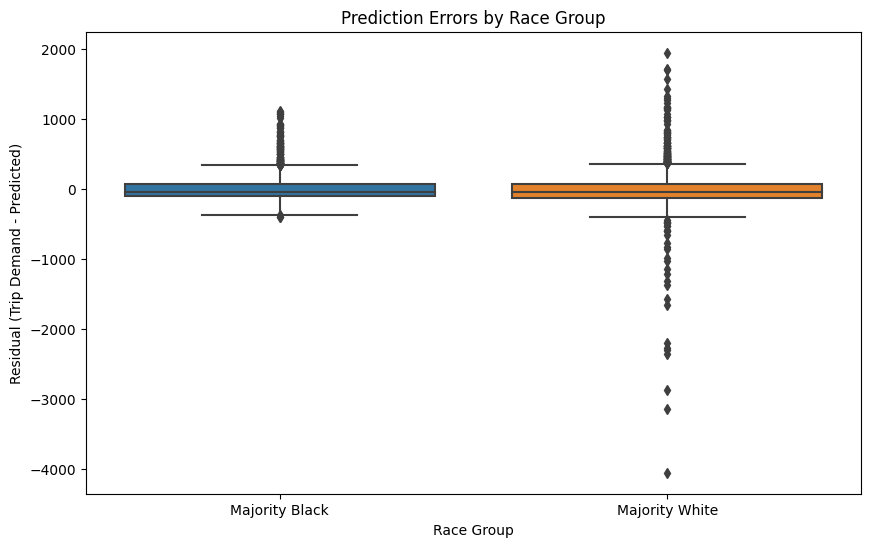

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(data=aggregated_data, x="Race Group", y="Residual")
plt.title("Prediction Errors by Race Group")
plt.xlabel("Race Group")
plt.ylabel("Residual (Trip Demand - Predicted)")
plt.show()


In [158]:
median_demand = aggregated_data["Trip Demand"].median()
aggregated_data["High Demand"] = aggregated_data["Trip Demand"] > median_demand


p_high_demand_black = aggregated_data[aggregated_data["Race Group"] == "Majority Black"]["High Demand"].mean()
p_high_demand_white = aggregated_data[aggregated_data["Race Group"] == "Majority White"]["High Demand"].mean()


dir_ratio = p_high_demand_black / p_high_demand_white
print(f"Disparate Impact Ratio: {dir_ratio:.3f}")


Disparate Impact Ratio: 1.247


If DIR = 1, then both groups experience similar ride demand.
If DIR > 1, the first group (Majority Black) has higher ride demand compared to the second group (Majority White).
If DIR < 1, the first group (Majority Black) has lower ride demand compared to the second group (Majority White).
Interpreting DIR Value: 1.247:

Majority Black areas have 24.7% higher likelihood of high ride demand compared to Majority White areas.
This suggests that ride-hailing trips are more frequent in Black-majority areas than in White-majority areas.
However, since this is just below the 1.25 threshold, it does not indicate strong discrimination but suggests a mild disparity.
What Could Be Causing This Disparity?
A DIR of 1.247 does not necessarily mean discrimination—it could be caused by: ✅ Higher reliance on ride-hailing in Black-majority areas due to:

Fewer private car owners.
Less access to public transit.
Higher urban density.
✅ Economic or Infrastructure Factors:

Ride-hailing might be the primary transport option in these areas.
Differences in fare affordability, ride availability, or incentives.
When is DIR a Concern?
If DIR < 0.8 or DIR > 1.25, it suggests a potential fairness issue.
Our DIR = 1.247 is close to 1.25, meaning there might be a slight imbalance in ride distribution, but it's not extreme.